## Exercise 08.2

### Valor medio di H in funzione degli step SA

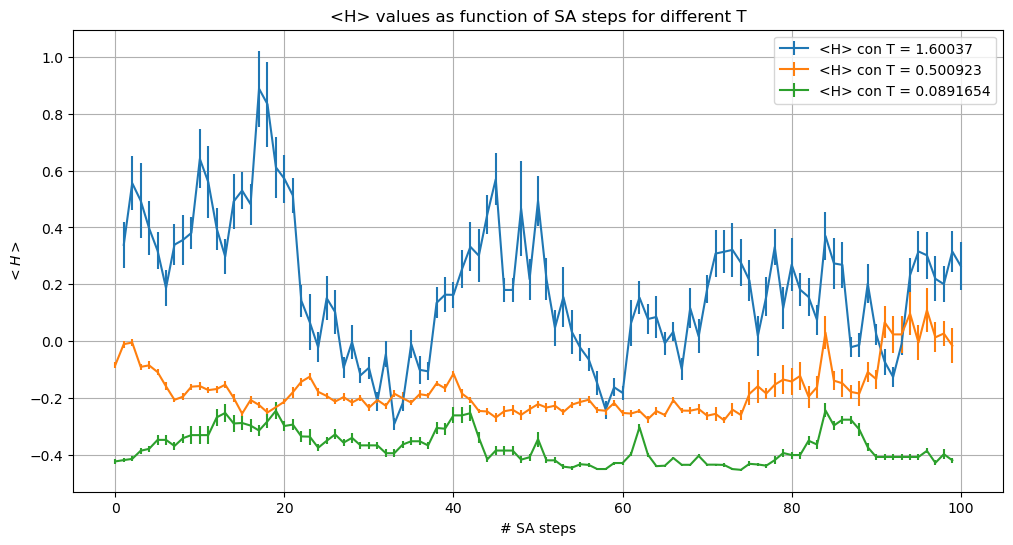

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Creazione di una figura con un solo subplot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

# Caricamento dei dati da un file di energia totale
# Prima serie di dati
x, temp, H, error_H = np.loadtxt("OUTPUT/Hvalues.dat", usecols=(0, 1, 2, 3), unpack=True, skiprows=1, max_rows=100)
T = temp[99]  # Temperatura relativa all'ultimo dato nella serie
ax1.errorbar(x, H, yerr=error_H, label=f"<H> con T = {T}")

# Seconda serie di dati
x, temp, H, error_H = np.loadtxt("OUTPUT/Hvalues.dat", usecols=(0, 1, 2, 3), unpack=True, skiprows=400, max_rows=100)
T = temp[99]  # Temperatura relativa all'ultimo dato nella serie
ax1.errorbar(x - 400, H, yerr=error_H, label=f"<H> con T = {T}")

# Terza serie di dati
x, temp, H, error_H = np.loadtxt("OUTPUT/Hvalues.dat", usecols=(0, 1, 2, 3), unpack=True, skiprows=1900, max_rows=100)
T = temp[99]  # Temperatura relativa all'ultimo dato nella serie
ax1.errorbar(x - 900, H, yerr=error_H, label=f"<H> con T = {T}")

# Personalizzazione delle etichette degli assi, del titolo e della legenda
ax1.set_xlabel('# SA steps')
ax1.set_ylabel(r'$<H>$')
ax1.set_title(r"<H> values as function of SA steps for different T")
ax1.grid(True)
ax1.legend()

# Mostra il grafico
plt.show()


Funzione per la variazione di beta :

$$
T(x) = e^{-Kx}\sqrt{x + p} 
$$ 


con K = 0.2 e p = 3.7 e $\Delta x = 1$

### Traiettoria SA nello spazio dei parametri

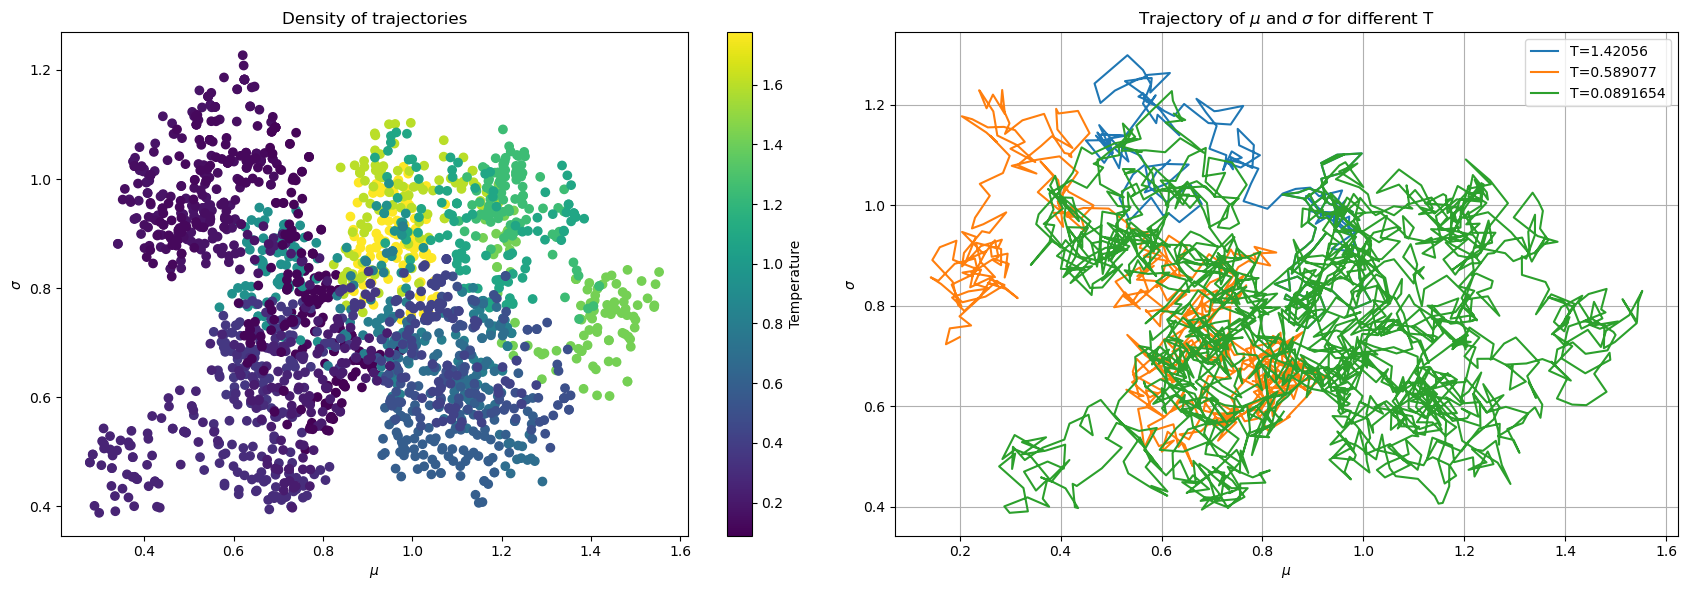

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Creare la figura con due aree disegnabili
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))  # Impostare la dimensione totale della figura

### Codice per il grafico di sinistra (scatter plot con gradiente di temperatura) ###
# Caricare i dati per la serie di T desiderata
step, temp, mu_values = np.loadtxt("OUTPUT/mu.dat", usecols=(0, 1, 2), unpack=True, skiprows=1900, max_rows=2000)
step, temp, sigma_values = np.loadtxt("OUTPUT/sigma.dat", usecols=(0, 1, 2), unpack=True, skiprows=1900, max_rows=2000)
T = temp[99]  # Selezionare una temperatura da visualizzare

# Disegnare le traiettorie con un scatter plot e gradiente di temperatura
sc = ax1.scatter(mu_values, sigma_values, c=temp, cmap='viridis')
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\sigma$')
ax1.set_title('Density of trajectories')
plt.colorbar(sc, ax=ax1, label='Temperature')

### Codice per il grafico di destra (line plot per le traiettorie di diverse T) ###
# Serie 1
step, temp, mu_values = np.loadtxt("OUTPUT/mu.dat", usecols=(0, 1, 2), unpack=True, skiprows=100, max_rows=200)
step, temp, sigma_values = np.loadtxt("OUTPUT/sigma.dat", usecols=(0, 1, 2), unpack=True, skiprows=100, max_rows=200)
T = temp[1]  # Selezionare una temperatura da visualizzare
ax2.plot(mu_values, sigma_values, label=f'T={T}')

# Serie 2
step, temp, mu_values = np.loadtxt("OUTPUT/mu.dat", usecols=(0, 1, 2), unpack=True, skiprows=400, max_rows=500)
step, temp, sigma_values = np.loadtxt("OUTPUT/sigma.dat", usecols=(0, 1, 2), unpack=True, skiprows=400, max_rows=500)
T = temp[1]  # Selezionare una temperatura da visualizzare
ax2.plot(mu_values, sigma_values, label=f'T={T}')

# Serie 3
step, temp, mu_values = np.loadtxt("OUTPUT/mu.dat", usecols=(0, 1, 2), unpack=True, skiprows=1900, max_rows=2000)
step, temp, sigma_values = np.loadtxt("OUTPUT/sigma.dat", usecols=(0, 1, 2), unpack=True, skiprows=1900, max_rows=2000)
T = temp[99]  # Selezionare una temperatura da visualizzare
ax2.plot(mu_values, sigma_values, label=f'T={T}')

# Aggiungere titolo e etichette agli assi del subplot destro
ax2.set_title(r'Trajectory of $\mu$ and $\sigma$ for different T')
ax2.set_xlabel(r'$\mu$')
ax2.set_ylabel(r'$\sigma$')
ax2.grid(True)
ax2.legend()

# Mostrare il grafico completo con layout aggiustato
plt.tight_layout()
plt.show()


**$\mu$ Ottimale = 0.749243**

**$\sigma$ Ottimale = 0.688018**

### Valor medio di H in funzione del numero di blocchi 

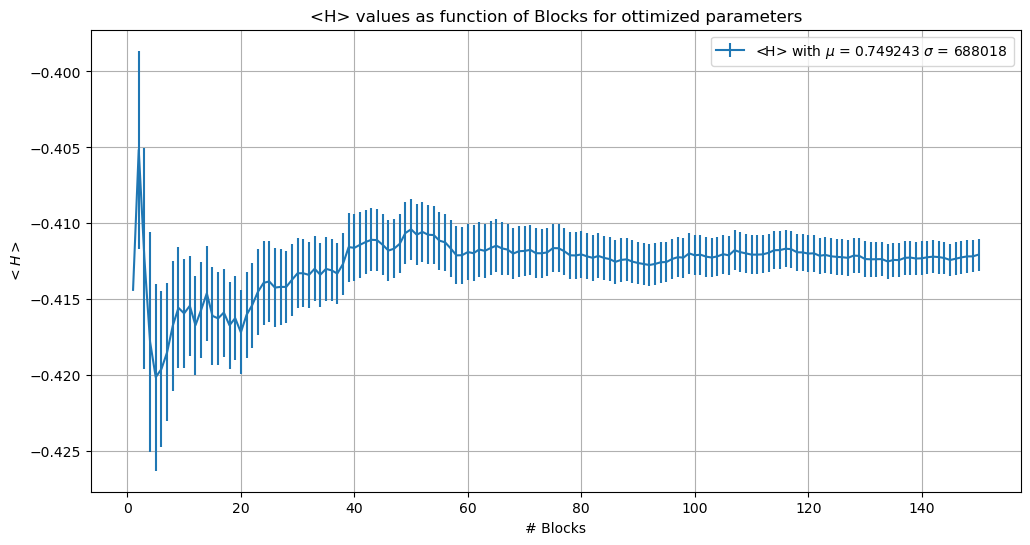

In [42]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
# Loading data from the total energy file
x, temp, H, error_H = np.loadtxt("../Esercizio_1/OUTPUT/Hvalues.dat", usecols=(0,1,2,3),unpack=True, skiprows=1, max_rows=150)
# Plotting the total energy per particle with error bars
ax1.errorbar(x, H,yerr=error_H, label=r"<H> with $\mu$ = 0.749243 $\sigma$ = 688018 ")

ax1.set_xlabel('# Blocks')
ax1.set_ylabel(r'$<H>$')
ax1.set_title(r"<H> values as function of Blocks for ottimized parameters")
ax1.grid(True)
ax1.legend()

### Istogramma di $|\Psi_T(x)|^2$

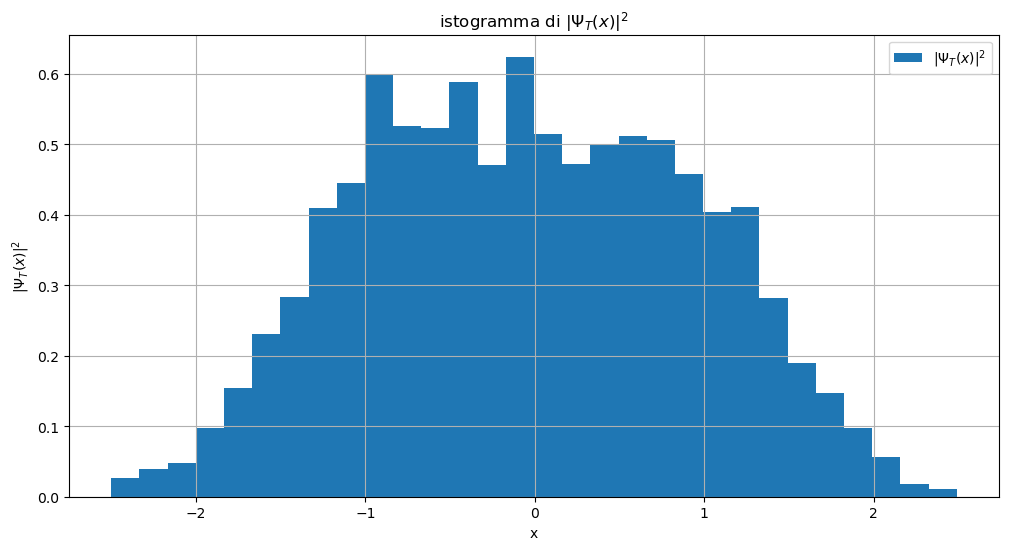

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Creazione della figura con un solo subplot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

# Caricamento dei dati per l'energia totale per particella con relativi errori
x, ave, error = np.loadtxt("../Esercizio_1/OUTPUT/histo.dat", usecols=(0, 1, 2), unpack=True, skiprows=1)

x=x/100

# Creazione dell'istogramma
ax1.hist(x, bins=30, weights=ave, label=r"$|\Psi_T(x)|^2$")

# Personalizzazione delle etichette degli assi, del titolo e della legenda
ax1.set_xlabel('x')
ax1.set_ylabel(r'$|\Psi_T(x)|^2$')
ax1.set_title(r"istogramma di $|\Psi_T(x)|^2$")
ax1.grid(True)
ax1.legend()

# Mostra il grafico
plt.show()


### Previsioni teoriche

Ground state energy:  -0.4604658796927152
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930193


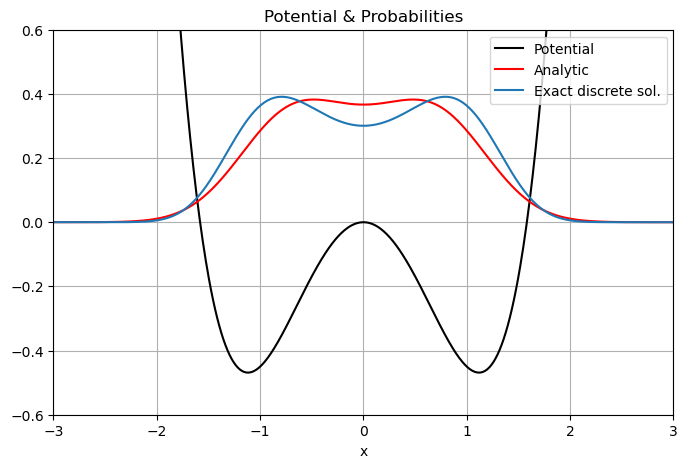

In [43]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

def psi_T(x, mu, sigma):
    psi = np.exp(-(x-mu)**2 / (2*sigma**2)) + np.exp(-(x+mu)**2 / (2*sigma**2))
    return psi**2


hbar = 1
m = 1
a = 10 #range di valori calcolati
N = 1000 # number of iterations
mu = 0.7492
sigma = 0.688

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
psi_t = psi_T(x, mu, sigma)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x, scale*psi_t, color="red", label="Analytic") # plot the potential
plt.plot(x,(psi[0])**2, label="Exact discrete sol.")
# plt.plot(x,(psi[1])**2)
# plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

plt.show()